Dataset - https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india?select=station_hour.csv

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py


ModuleNotFoundError: No module named 'chart_studio'

In [ ]:
od.download('https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india?select=station_hour.csv')

In [ ]:
data = pd.read_csv("/content/air-quality-data-in-india/city_day.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.rename(columns = {'AQI_Bucket':'Air_quality'}, inplace = True)
data.head()

City       Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad 2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad 2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad 2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad 2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad 2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI Air_quality  
0  133.36     0.00     0.02    0.00  NaN         NaN  
1   34.06     3.68     5.50    3.77  NaN         NaN  
2   30.70     6.80    16.40    2.25  NaN         NaN  
3   36.08     4.43    10.14    1.00  NaN         NaN  
4   39.31     7.01    18.89    2.78  NaN         NaN

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         29531 non-null  object        
 1   Date         29531 non-null  datetime64[ns]
 2   PM2.5        24933 non-null  float64       
 3   PM10         18391 non-null  float64       
 4   NO           25949 non-null  float64       
 5   NO2          25946 non-null  float64       
 6   NOx          25346 non-null  float64       
 7   NH3          19203 non-null  float64       
 8   CO           27472 non-null  float64       
 9   SO2          25677 non-null  float64       
 10  O3           25509 non-null  float64       
 11  Benzene      23908 non-null  float64       
 12  Toluene      21490 non-null  float64       
 13  Xylene       11422 non-null  float64       
 14  AQI          24850 non-null  float64       
 15  Air_quality  24850 non-null  object        
dtypes: d

In [ ]:
data.describe(include='all')

<ipython-input-62-589a52936347>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



City                 Date         PM2.5          PM10  \
count       29531                29531  24933.000000  18391.000000   
unique         26                 2009           NaN           NaN   
top     Ahmedabad  2020-07-01 00:00:00           NaN           NaN   
freq         2009                   26           NaN           NaN   
first         NaN  2015-01-01 00:00:00           NaN           NaN   
last          NaN  2020-07-01 00:00:00           NaN           NaN   
mean          NaN                  NaN     67.450578    118.127103   
std           NaN                  NaN     64.661449     90.605110   
min           NaN                  NaN      0.040000      0.010000   
25%           NaN                  NaN     28.820000     56.255000   
50%           NaN                  NaN     48.570000     95.680000   
75%           NaN                  NaN     80.590000    149.745000   
max           NaN                  NaN    949.990000   1000.000000   

                  NO           NO2           NOx           NH3            CO  \
count   25949.000000  25946.000000  25346.000000  19203.000000  27472.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean       17.574730     28.560659     32.309123     23.483476      2.248598   
std        22.785846     24.474746     31.646011     25.684275      6.962884   
min         0.020000      0.010000      0.000000      0.010000      0.000000   
25%         5.630000     11.750000     12.820000      8.580000      0.510000   
50%         9.890000     21.690000     23.520000     15.850000      0.890000   
75%        19.950000     37.620000     40.127500     30.020000      1.450000   
max       390.680000    362.210000    467.630000    352.890000    175.810000   

                 SO2            O3       Benzene       Toluene        Xylene  \
count   25677.000000  25509.000000  23908.000000  21490.000000  11422.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean       14.531977     34.491430      3.280840      8.700972      3.070128   
std        18.133775     21.694928     15.811136     19.969164      6.323247   
min         0.010000      0.010000      0.000000      0.000000      0.000000   
25%         5.670000     18.860000      0.120000      0.600000      0.140000   
50%         9.160000     30.840000      1.070000      2.970000      0.980000   
75%        15.220000     45.570000      3.080000      9.150000      3.350000   
max       193.860000    257.730000    455.030000    454.850000    170.370000   

                 AQI Air_quality  
count   24850.000000       24850  
unique           NaN           6  
top              NaN    Moderate  
freq             NaN        8829  
first            NaN         NaN  
last             NaN         NaN  
mean      166.463581         NaN  
std       140.696585         NaN  
min        13.000000         NaN  
25%        81.000000         NaN  
50%       118.000000         NaN  
75%       208.000000         NaN  
max      2049.000000         NaN

In [ ]:
df = data.copy()
df['PM2.5'] = df['PM2.5'].fillna((df['PM2.5'].median()))
df['PM10'] = df['PM10'].fillna((df['PM10'].median()))
df['NO'] = df['NO'].fillna((df['NO'].median()))
df['NO2'] = df['NO2'].fillna((df['NO2'].median()))
df['NOx'] = df['NOx'].fillna((df['NOx'].median()))
df['NH3'] = df['NH3'].fillna((df['NH3'].median()))
df['CO'] = df['CO'].fillna((df['CO'].median()))
df['SO2'] = df['SO2'].fillna((df['SO2'].median()))
df['O3'] = df['O3'].fillna((df['O3'].median()))
df['Benzene'] = df['Benzene'].fillna((df['Benzene'].median()))
df['Toluene'] = df['Toluene'].fillna((df['Toluene'].median()))
df['Xylene'] = df['Xylene'].fillna((df['Xylene'].median()))
df['AQI'] = df['AQI'].fillna((df['AQI'].median()))
df['Air_quality'] = df['Air_quality'].fillna('Moderate')


In [ ]:
fig = px.box(df, x='City', y='AQI', title='AQI Distribution Across Cities')
fig.show()

In [ ]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']
fig = px.box(df, y=pollutants, title='Distribution of Pollutants')
fig.show()


In [ ]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['PM2.5'], mode='lines', name='PM2.5', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df.index, y=df['PM10'], mode='lines', name='PM10', line=dict(color='red')))

# Edit the layout
fig.update_layout(title='PM2.5 and PM10 Levels Over Time',
                   xaxis_title='Date',
                   yaxis_title='Level')

fig.show()


<ipython-input-13-ef6250ddbd26>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



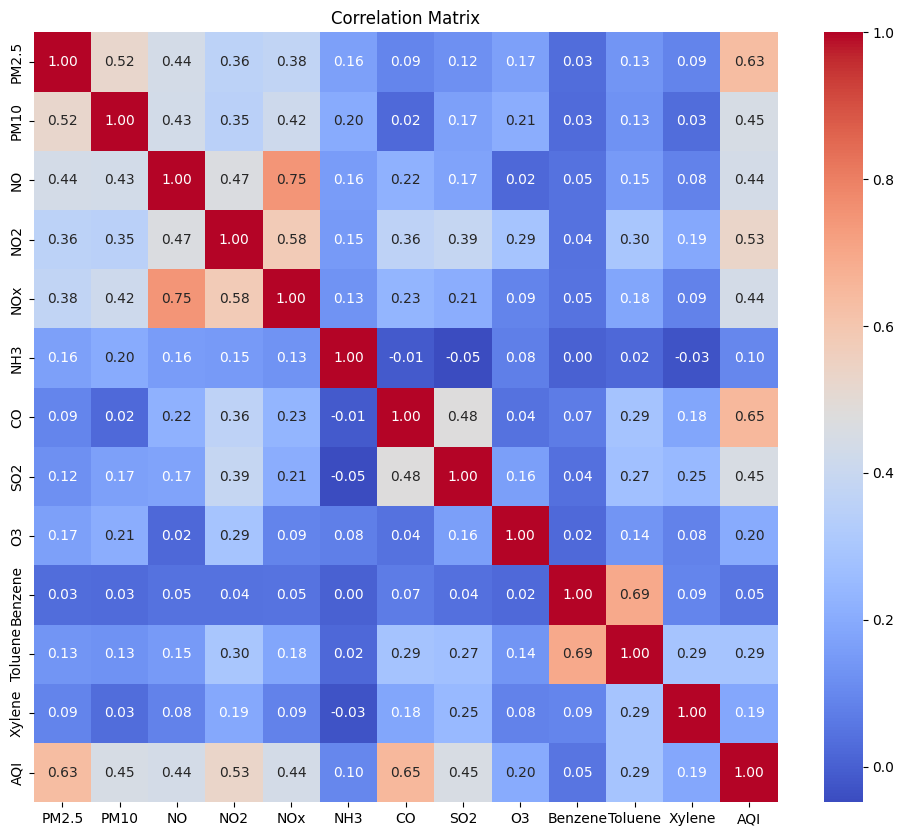

In [ ]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


<ipython-input-35-2b20b39f47be>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




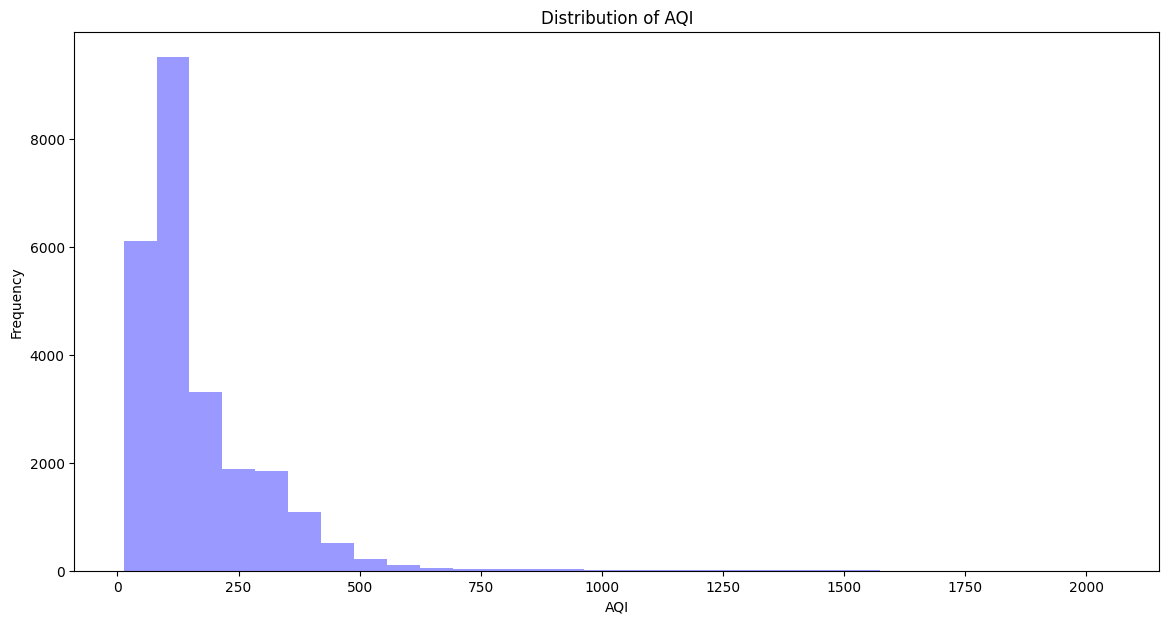

In [ ]:
# Distribution plots
plt.figure(figsize=(14, 7))
sns.distplot(df['AQI'].dropna(), bins=30, kde=False, color='blue')
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show();


In [ ]:

#preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
# Classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


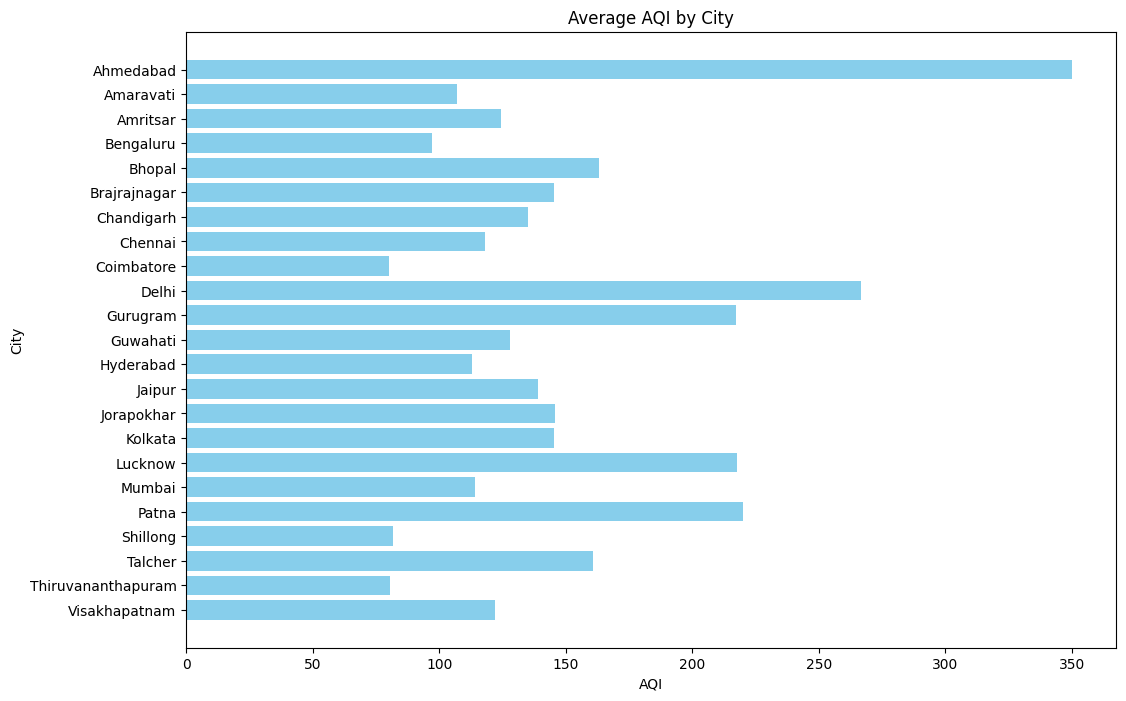

In [ ]:

df_filtered = df.dropna(subset=['AQI'])
# Group by City and calculate mean AQI
city_aqi = df_filtered.groupby('City')['AQI'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 8))
plt.barh(city_aqi['City'], city_aqi['AQI'], color='skyblue')
plt.xlabel('AQI')
plt.ylabel('City')
plt.title('Average AQI by City')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest AQI at the top
plt.show()

In [ ]:
categorical_attributes = list(df.select_dtypes(include=['object']).columns)
print("categorical_attributes",categorical_attributes)
le=LabelEncoder()
df['City']=le.fit_transform(df['City'].astype(str))
df['Air_quality']=le.fit_transform(df['Air_quality'].astype(str))
df.info()

categorical_attributes ['City', 'Air_quality']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         29531 non-null  int64         
 1   Date         29531 non-null  datetime64[ns]
 2   PM2.5        29531 non-null  float64       
 3   PM10         29531 non-null  float64       
 4   NO           29531 non-null  float64       
 5   NO2          29531 non-null  float64       
 6   NOx          29531 non-null  float64       
 7   NH3          29531 non-null  float64       
 8   CO           29531 non-null  float64       
 9   SO2          29531 non-null  float64       
 10  O3           29531 non-null  float64       
 11  Benzene      29531 non-null  float64       
 12  Toluene      29531 non-null  float64       
 13  Xylene       29531 non-null  float64       
 14  AQI          29531 non-null  float64       
 15  Air_qu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24908 entries, 0 to 29348
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          24908 non-null  int64         
 1   Date                          24908 non-null  datetime64[ns]
 2   AQI                           24908 non-null  float64       
 3   Air_quality                   24908 non-null  int64         
 4   Vehicular Pollution content   24908 non-null  float64       
 5   Industrial Pollution content  24908 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 1.3 MB


In [ ]:
cor = df.corr()
cor.style.background_gradient(cmap='coolwarm')

<ipython-input-16-ea7c0a183c93>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
y = df["Air_quality"]
x = df[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
print('Classes and number of values in trainset',Counter(y_train))

Classes and number of values in trainset Counter({1: 9393, 5: 9393, 3: 9393, 0: 9393, 2: 9393, 4: 9393})


In [ ]:
# Data Imbalance
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train,y_train = oversample.fit_resample(X_train,y_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y_train))

Classes and number of values in trainset after SMOTE: Counter({1: 9393, 5: 9393, 3: 9393, 0: 9393, 2: 9393, 4: 9393})


SVM

In [ ]:
cls=SVC()
cls.fit(X_train,y_train)
svmpred=cls.predict(X_test)
svmpred
cm=confusion_matrix(y_test,svmpred)

In [ ]:
print("confussion matrix")
print(cm)

confussion matrix
[[ 393    0    0    0    0    0]
 [   0 3948   76   93    0    0]
 [   0    0  821    0    0   20]
 [ 126    1    0 2298    0    0]
 [   0    0    0    0  378    3]
 [   0    0    2    0   12  689]]


In [ ]:
accuracy=accuracy_score(y_test,svmpred)
print("accuracy",accuracy*100)

accuracy 96.24153498871331


In [ ]:
# Print classification report
print("SVM Classification Report :")
print(classification_report(y_test, svmpred))

SVM Classification Report :
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       393
           1       1.00      0.96      0.98      4117
           2       0.91      0.98      0.94       841
           3       0.96      0.95      0.95      2425
           4       0.97      0.99      0.98       381
           5       0.97      0.98      0.97       703

    accuracy                           0.96      8860
   macro avg       0.93      0.98      0.95      8860
weighted avg       0.97      0.96      0.96      8860



In [ ]:
model_filename = '/content/drive/MyDrive/Air_pollutant/SVM.joblib'
dump(cls, model_filename)

['/content/drive/MyDrive/Air_pollutant/SVM.joblib']

Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=20, random_state=23)
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)
rf_predict1=rf.predict(X_train)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)

In [ ]:
print("confussion matrix")
print(rf_conf_matrix)

confussion matrix
[[ 393    0    0    0    0    0]
 [   0 4117    0    0    0    0]
 [   0    2  839    0    0    0]
 [   0    0    0 2425    0    0]
 [   0    0    0    0  381    0]
 [   0    0    0    0    0  703]]


In [ ]:
print("accuracy",rf_acc_score*100)

accuracy 99.97742663656885


In [ ]:
# Print classification report
print("SVM Classification Report :")
print(classification_report(y_test, rf_predict))

SVM Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00      4117
           2       1.00      1.00      1.00       841
           3       1.00      1.00      1.00      2425
           4       1.00      1.00      1.00       381
           5       1.00      1.00      1.00       703

    accuracy                           1.00      8860
   macro avg       1.00      1.00      1.00      8860
weighted avg       1.00      1.00      1.00      8860



In [ ]:

from joblib import dump
# Save the trained model to a specific location
model_filename = '/content/drive/MyDrive/Air_pollutant/random_forest_model.joblib'
dump(rf, model_filename)
print("Trained model saved at:", model_filename)

Trained model saved at: /content/drive/MyDrive/Air_pollutant/random_forest_model.joblib


In [ ]:
# Save the trained model
model_filename = 'random_forest_model.joblib'
dump(rf, model_filename)
print("Trained model saved as:", model_filename)

XGBoost

In [ ]:
gbc=XGBClassifier(learning_rate =0.01,n_estimators=100,max_depth=1,
                  min_child_weight=6,subsample=0.8,seed=13)
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test, pred)*100

In [ ]:
print("confussion matrix")
print(xgb_conf_matrix)

confussion matrix
[[ 393    0    0    0    0    0]
 [   0 4043   18   56    0    0]
 [   0    0  820    0    0   21]
 [   0    0    0 2425    0    0]
 [   0    0    0    0  381    0]
 [   0    0    0    0   13  690]]


In [ ]:
print("accuracy",accuracy)

accuracy 98.78103837471784


In [ ]:
# Print classification report
print("XGBoost Classification Report :")
print(classification_report(y_test, pred))

XGBoost Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      0.98      0.99      4117
           2       0.98      0.98      0.98       841
           3       0.98      1.00      0.99      2425
           4       0.97      1.00      0.98       381
           5       0.97      0.98      0.98       703

    accuracy                           0.99      8860
   macro avg       0.98      0.99      0.99      8860
weighted avg       0.99      0.99      0.99      8860



In [ ]:
model_filename = '/content/drive/MyDrive/Air_pollutant/XGBoost.joblib'
dump(gbc, model_filename)


['/content/drive/MyDrive/Air_pollutant/XGBoost.joblib']